# EDA - 카테고리별 월 거래금액(매출액) 시각화

가설1: 2022년에 급속하게 발전하고 공개된 인공지능 기술, 특히 ChatGPT와 Stable Diffusion 같은 AI 시스템의 출현이 관련 강의 판매에 긍정적인 영향을 미쳤을 것이다. 이 가설을 검증함으로써, 패스트캠퍼스는 향후 인공지능 시장 트렌드를 분석하여 수요가 높을 강의 분야를 예측하고, 이를 통해 기업의 매출 성장에 도움을 줄 수 있을 것이다.

가설2: 매출 변화가 큰 달을 분석하여, 패스트캠퍼스 강의 매출이 어떠한 요인들에 영향을 받았는지 알아보면 추후에 트렌드를 반영하여 매출에 긍정적인 영향을 줄 수 있을 것이다.

In [69]:
# 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

# 글꼴 깨짐 방지
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False

# 데이터 프레임 
df = pd.read_csv("/Users/b26/Desktop/미니프로젝트/패스트캠퍼스 데이터분석/실습데이터.csv")

#MeCab 사용
# from konlpy.tag import Mecab
# from PIL import Image
# import nltk
# import os
# import re

# # Word Cloud
# from wordcloud import WordCloud
# 거래 금액 형변환
df['거래금액'] = pd.to_numeric(df['거래금액'], errors='coerce').fillna(0)
# 이상치 데이터 전처리
# df_except = df['쿠폰이름'].str.contains('강사|직원|내부|검수|CX|cx|참고|test')
# df_plus = ~(df['쿠폰이름'].str.contains('지인|유성민|Kubernetes'))
# df[df_except & df_plus & (df['판매가격'] == df['쿠폰할인액'])].to_csv('쿠폰제외.csv', encoding='utf-8-sig')



## 거래일자 데이터 타입 변환하기

In [70]:
df['거래일자']

0         2022. 12. 31. 오후 10:12:33
1          2022. 12. 30. 오후 6:12:57
2         2022. 12. 31. 오후 11:12:15
3         2022. 12. 31. 오후 11:12:03
4         2022. 12. 31. 오후 11:12:10
                    ...            
159323      2022. 1. 1. 오전 12:01:08
159324      2022. 1. 1. 오전 12:01:12
159325      2022. 1. 1. 오전 12:01:21
159326      2022. 1. 2. 오전 11:01:24
159327      2022. 1. 24. 오전 4:01:00
Name: 거래일자, Length: 159328, dtype: object

## 함수를 통해 '오전', '오후'를 영문으로 변환 (to_datetime 적용하기 위해서)

In [71]:
def convert_korean_to_english_ampm(date_string):
    date_string = date_string.replace('오전', 'AM').replace('오후', 'PM')
    return date_string

## 거래일자에 함수 적용 후 대체

In [72]:
df['거래일자'] = df['거래일자'].apply(convert_korean_to_english_ampm)

In [73]:
df['거래일자'] = pd.to_datetime(df['거래일자'], format='%Y. %m. %d. %p %I:%M:%S')

## '월' 컬럼 추가

In [74]:
df['월'] = df['거래일자'].dt.month

In [75]:
df.columns

Index(['거래id', '유형', '고객id', '코스ID', '사이트', '포맷', '카테고리', '코스(상품) 이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액', '월'],
      dtype='object')

In [87]:
df_monthly_sales = df[['월', '카테고리', '거래금액']]

In [100]:
df_monthly_sales['월'] = df_monthly_sales['월'].astype(int)


## 월과 카테고리를 groupby 하여 거래 금액 합 파악

In [89]:
df_monthly_sales = df_monthly_sales.groupby(['월', '카테고리']).sum().reset_index()

In [91]:
df_monthly_sales = df_monthly_sales.sort_values(by='거래금액',ascending=False)

# 월, 카테고리별 거래금액 단위 변경( 억 )

In [92]:
df_monthly_sales['거래금액'] = df_monthly_sales['거래금액'] / 100000000

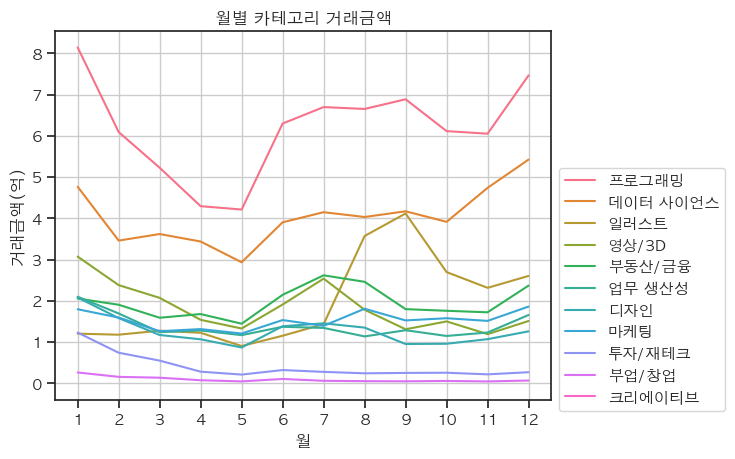

In [99]:
sns.set(style='ticks')

# 맥북에서 설치된 한글 폰트로 설정
plt.rc('font', family='AppleGothic')

# 꺾은선그래프 그리기
sns.lineplot(data=df_monthly_sales, x='월', y='거래금액', hue='카테고리')

# 그래프 타이틀 설정
plt.title('월별 카테고리 거래금액')
# x축 눈금 설정
plt.xticks(range(1, 13)) # 1부터 12까지 1단위씩 표시
# x축 레이블 설정
plt.xlabel('월')
# 격자 추가
plt.grid(True)
# y축 레이블 설정
plt.ylabel('거래금액(억)')
# legend 위치 변경
plt.legend(loc='center left', bbox_to_anchor=(1, 0.3))
# 그래프 보여주기
plt.show()

## 가설1 증명해보기: AI 의 발전이 패스트캠퍼스에 어떤 영향을 주었을까?

### AI 타임라인 : DALL-E 2  -> 2022년 4월
### Midjourney -> 2022년 7월
### Stable Diffusion -> 8월
### chatGPT ->https://www.aitimes.com/news/articleView.html?idxno=148212  11월 30일 공개


 그래프를 분석해보았을 때, 특정 카테고리( 일러스트 ) 를 제외한 나머지 강의들의 매출 변화율이 유사하다.
 이를 통해 대형 AI의 출현보다는, 시기별로 패스트캠퍼스 전체 강의 매출에 영향을 끼친 어떠한 경제적 상황, 패스트캠퍼스 정책등이 매출 변화에 더 유의미한 영향을 끼쳤다고 볼 수 있다.

## 매출변화가 눈에 띄게 컸던 7-9월 일러스트 카테고리의 원인 분석해보기

In [129]:
df_drawing = df[df['카테고리'] == '일러스트']

## 거래 일자 7~9월인 일러스트 강의들 추출

In [130]:
mask = (df_drawing['월'] > 6) & (df_drawing['월'] < 10)

In [131]:
df_drawing = df_drawing.loc[mask]

In [132]:
df_drawing = df_drawing[['코스ID','거래금액','코스(상품) 이름','월','쿠폰할인액','쿠폰이름']]

In [134]:
df_drawing = df_drawing.sort_values(by='거래금액',ascending=False)

In [136]:
df_drawing.head(50)

,코스ID,거래금액,코스(상품) 이름,월,쿠폰할인액,쿠폰이름
57962,212598,500000.0,네오아카데미 : 설의 매트페인팅으로 만드는 감성적인 캐주얼 일러스트,8,-,-
58810,212600,500000.0,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,8,-,-
59670,212598,500000.0,네오아카데미 : 설의 매트페인팅으로 만드는 감성적인 캐주얼 일러스트,8,-,-
58444,212598,500000.0,네오아카데미 : 설의 매트페인팅으로 만드는 감성적인 캐주얼 일러스트,8,-,-
58443,212600,500000.0,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,8,-,-
53399,212598,500000.0,네오아카데미 : 설의 매트페인팅으로 만드는 감성적인 캐주얼 일러스트,9,-,-
58429,212600,500000.0,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,8,-,-
58410,212600,500000.0,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,8,-,-
59728,212600,500000.0,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,8,-,-
53447,212600,500000.0,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,9,-,-


### 📣 2022년 6월 17일 패스트캠퍼스와 네오아카데미 업무 협약 체결
[출처] [패스트캠퍼스 X 네오아카데미] "앞으로도 우리나라 일러스트와 그래픽이 세계의 선두가 되었으면 좋겠어요" - 네오아카데미 노진 대표 인터뷰|작성자 

### 패스트캠퍼스 X 네오아카데미

▼ 첫 강의는 22년 8월 22일(월) 패스트캠퍼스에서 오픈됩니다 ▼
[출처] [패스트캠퍼스 X 네오아카데미] "앞으로도 우리나라 일러스트와 그래픽이 세계의 선두가 되었으면 좋겠어요" - 네오아카데미 노진 대표 인터뷰|작성자 패스트캠퍼스


### 네오아카데미는 국내 일러스트 전문 학원 중 하나로, 2021 KBPA 브랜드 선호도 1위, 2020 KCSA 한국 소비자 어워즈 1위, 2019 KBA 한국 교육서비스 어워즈 대상을 수상 했다. 또 11만 명 이상의 회원 보유한 커뮤니티를 운영 중이며, 유튜브 구독자 수는 33만 명 이상 보유하고 있다.

### 패스트 캠퍼스가 매출에 굉장히 긍정적인 영향을 미친 회사정책이, 이러한 기업과의 협약을 통해 온라인강의를 개설하는 경우라고 볼 수 있을 것 같다. 이를 통해 이미지가 좋은 분야에서 전문적인 기업과의 협약이나, 구독자를 많이 가지고있는 유튜버에게 강의 환경을 제공하여 패스트캠퍼스에서 강의를 하게 될 경우, 구독자들에 대한 홍보와 해당 유튜버의 신뢰도를 바탕으로 유의미한 매출을 만들 수 있을 것 같다.

In [139]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from pprint import pprint
from tqdm.notebook import tqdm
import calendar

'''''''''''''''''''''''''''''''''''''''''''''''''''''''''
< naver 뉴스 전문 가져오기 >_select 사용
- 네이버 뉴스만 가져와서 결과값 조금 작음 
- 결과 메모장 저장 -> 엑셀로 저장 
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''
RESULT_PATH = './'
now = datetime.now() #파일이름 현 시간으로 저장하기

def get_news(n_url):
    news_detail = []

    breq = requests.get(n_url, headers={'User-Agent':'Mozilla/5.0'})
    bsoup = BeautifulSoup(breq.content)

    title = bsoup.find('h2', class_='media_end_head_headline').text
    news_detail.append(title)

    pdate = bsoup.find('span', class_="media_end_head_info_datestamp_time _ARTICLE_DATE_TIME").text[:11]
    news_detail.append(pdate)

    _text = bsoup.find('div', class_='newsct_article _article_body').get_text().replace('\n', " ")
    _text = _text.replace("    동영상 뉴스   ", "")
    btext = _text.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
    news_detail.append(btext.strip())
  
    news_detail.append(n_url)
    
    pcompany = bsoup.find('div', class_='copyright').find('p', class_='c_text').text
    pcompany = pcompany.split('All rights reserved.')[0].split('Copyright ⓒ')[1].strip()
    news_detail.append(pcompany)

    return news_detail

def crawler(maxpage,query,s_date,e_date):

    crawled_data = {}
    years = []
    company = []
    title = []
    contents = []
    link = []
    s_from = s_date.replace(".","")
    e_to = e_date.replace(".","")
    page = 1
    maxpage_t =(int(maxpage)-1)*10+1   # 11= 2페이지 21=3페이지 31=4페이지  ...81=9페이지 , 91=10페이지, 101=11페이지

    f = open(RESULT_PATH + f"contents_text_{query}.txt", 'w', encoding='utf-8-sig')
    
    for page in tqdm(range(1, maxpage_t+1, 10)):
    
        url = "https://search.naver.com/search.naver?where=news&query=" + query + "&sort=0&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + "%2Ca%3A&start=" + str(page)
        
        req = requests.get(url,
                          headers={'User-Agent':'Mozilla/5.0'})
        print(url)
        cont = req.content
        soup = BeautifulSoup(cont)
        
        for urls in soup.find_all("a", class_="info"):
            try :
                if urls.get_text() == "네이버뉴스":
                    print(urls["href"])
                    news_detail = get_news(urls["href"])
                        # pdate, pcompany, title, btext
                    f.write("{}\t{}\t{}\t{}\t{}\n".format(news_detail[1], news_detail[4], news_detail[0], news_detail[2],news_detail[3]))  # new style
                    years.append(news_detail[1])
                    company.append(news_detail[4])
                    title.append(news_detail[0])
                    contents.append(news_detail[2])
                    link.append(news_detail[3])
                    
            except Exception as e:
                print(e)
                continue
        
    crawled_data["years"] = years
    crawled_data["company"] = company
    crawled_data["title"] = title
    crawled_data["contents"] = contents
    crawled_data["link"] = link
    f.close()
    return crawled_data
    
def excel_make(crawled_data):
    data = pd.DataFrame(crawled_data)
    
    xlsx_outputFileName = f'{query}_({s_date}~{e_date}).xlsx'
    data.to_excel(RESULT_PATH+xlsx_outputFileName, index=False)

for i in range(4,13):
    maxpage = 200
    query = "AI"
    s_date = datetime(2023, i, 1).strftime('%Y.%m.%d')
    _, last_day = calendar.monthrange(2023, i)
    e_date = datetime(2023, i, last_day).strftime('%Y.%m.%d')
    crawled_data = crawler(maxpage,query,s_date,e_date) #검색된 네이버뉴스의 기사내용을 크롤링합니다. 
    excel_make(crawled_data) #엑셀로 만들기

  0%|          | 0/200 [00:00<?, ?it/s]

https://search.naver.com/search.naver?where=news&query=AI&sort=0&ds=2023.01.01&de=2023.01.31&nso=so%3Ar%2Cp%3Afrom20230101to20230131%2Ca%3A&start=1
https://n.news.naver.com/mnews/article/003/0011666499?sid=102
https://n.news.naver.com/mnews/article/023/0003743456?sid=105
https://n.news.naver.com/mnews/article/003/0011667054?sid=105
https://n.news.naver.com/mnews/article/001/0013727156?sid=104
https://n.news.naver.com/mnews/article/243/0000039055?sid=105
https://n.news.naver.com/mnews/article/629/0000198027?sid=105
https://n.news.naver.com/mnews/article/366/0000873415?sid=101
https://n.news.naver.com/mnews/article/023/0003743246?sid=105
https://n.news.naver.com/mnews/article/009/0005081314?sid=105
https://n.news.naver.com/mnews/article/052/0001843680?sid=104
https://search.naver.com/search.naver?where=news&query=AI&sort=0&ds=2023.01.01&de=2023.01.31&nso=so%3Ar%2Cp%3Afrom20230101to20230131%2Ca%3A&start=11
https://n.news.naver.com/mnews/article/277/0005211247?sid=105
https://n.news.naver.

  0%|          | 0/200 [00:00<?, ?it/s]

https://search.naver.com/search.naver?where=news&query=AI&sort=0&ds=2023.02.01&de=2023.02.28&nso=so%3Ar%2Cp%3Afrom20230201to20230228%2Ca%3A&start=1
https://n.news.naver.com/mnews/article/088/0000801077?sid=100
https://n.news.naver.com/mnews/article/001/0013783128?sid=104
https://n.news.naver.com/mnews/article/215/0001085864?sid=101
https://n.news.naver.com/mnews/article/469/0000725924?sid=105
https://n.news.naver.com/mnews/article/003/0011716581?sid=102
https://n.news.naver.com/mnews/article/417/0000899377?sid=101
https://n.news.naver.com/mnews/article/003/0011716201?sid=105
https://n.news.naver.com/mnews/article/108/0003132599?sid=004
https://n.news.naver.com/mnews/article/014/0004975730?sid=105
https://n.news.naver.com/mnews/article/092/0002283823?sid=105
https://search.naver.com/search.naver?where=news&query=AI&sort=0&ds=2023.02.01&de=2023.02.28&nso=so%3Ar%2Cp%3Afrom20230201to20230228%2Ca%3A&start=11
https://n.news.naver.com/mnews/article/015/0004815352?sid=105
https://n.news.naver.

  0%|          | 0/200 [00:00<?, ?it/s]

https://search.naver.com/search.naver?where=news&query=AI&sort=0&ds=2023.03.01&de=2023.03.31&nso=so%3Ar%2Cp%3Afrom20230301to20230331%2Ca%3A&start=1
https://n.news.naver.com/mnews/article/001/0013850144?sid=104
https://n.news.naver.com/mnews/article/003/0011775970?sid=105
https://n.news.naver.com/mnews/article/011/0004173648?sid=102
https://n.news.naver.com/mnews/article/366/0000889676?sid=105
https://n.news.naver.com/mnews/article/009/0005109811?sid=105
https://n.news.naver.com/mnews/article/092/0002287320?sid=105
https://n.news.naver.com/mnews/article/215/0001092656?sid=101
https://n.news.naver.com/mnews/article/018/0005453521?sid=101
https://n.news.naver.com/mnews/article/009/0005109960?sid=101
https://n.news.naver.com/mnews/article/079/0003754123?sid=102
https://search.naver.com/search.naver?where=news&query=AI&sort=0&ds=2023.03.01&de=2023.03.31&nso=so%3Ar%2Cp%3Afrom20230301to20230331%2Ca%3A&start=11
https://n.news.naver.com/mnews/article/001/0013850718?sid=100
https://n.news.naver.

  0%|          | 0/200 [00:00<?, ?it/s]

https://search.naver.com/search.naver?where=news&query=AI&sort=0&ds=2023.04.01&de=2023.04.30&nso=so%3Ar%2Cp%3Afrom20230401to20230430%2Ca%3A&start=1
https://n.news.naver.com/mnews/article/092/0002290698?sid=105
https://n.news.naver.com/mnews/article/366/0000897984?sid=104
https://n.news.naver.com/mnews/article/001/0013911924?sid=102
https://n.news.naver.com/mnews/article/020/0003494591?sid=102
https://n.news.naver.com/mnews/article/001/0013912202?sid=104
https://n.news.naver.com/mnews/article/015/0004839238?sid=105
https://n.news.naver.com/mnews/article/030/0003095271?sid=102
https://n.news.naver.com/mnews/article/421/0006778864?sid=101
https://n.news.naver.com/mnews/article/092/0002290684?sid=105
https://n.news.naver.com/mnews/article/001/0013913144?sid=102
https://search.naver.com/search.naver?where=news&query=AI&sort=0&ds=2023.04.01&de=2023.04.30&nso=so%3Ar%2Cp%3Afrom20230401to20230430%2Ca%3A&start=11
https://n.news.naver.com/mnews/article/001/0013912425?sid=103
https://n.news.naver.

KeyboardInterrupt: 